In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('D:/Kuliah/TA/DATAGABUNG4.csv')

In [4]:
data.head()

Normal  Signature  Dangerous          Jenis
0       3          0          4     Trojan-SMS
1       3          0          5     Trojan-SMS
2       5          2          6       RiskTool
3      11          3         10       RiskTool
4       4          0          8  Trojan-Ransom

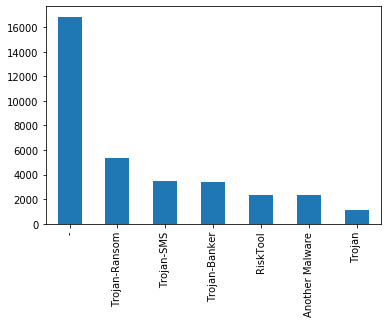

In [5]:
data['Jenis'].value_counts().plot.bar()

In [6]:
print('Proportion of the classes in the data:')
print(data['Jenis'].value_counts() / len(data))

Proportion of the classes in the data:
-                  0.482363
Trojan-Ransom      0.154154
Trojan-SMS         0.099954
Trojan-Banker      0.097435
RiskTool           0.067972
Another Malware    0.066312
Trojan             0.031810
Name: Jenis, dtype: float64


In [7]:
# data = data.drop([''], axis = 1)
X = np.array(data.loc[:, data.columns != 'Jenis'])
y = np.array(data.loc[:, data.columns == 'Jenis']).reshape(-1, 1)

In [8]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, shuffle = True, stratify = y)

In [10]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

In [11]:
# fit the model
clf.fit(X_train, y_train.ravel())

# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

In [12]:

print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.5702934860415175
Accuracy score for Testing Dataset =  0.5711422845691383


In [13]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted            -  RiskTool  Trojan-Banker  Trojan-Ransom  Trojan-SMS  \
True                                                                         
-                12251       110            232            688         196   
Another Malware    940         2            204            606         101   
RiskTool          1230       563             10             59          37   
Trojan             741         1             17            127           3   
Trojan-Banker     1375         0             70            688         589   
Trojan-Ransom     1440         0             17           2542         308   
Trojan-SMS        1673        19            136            457         508   
All              19650       695            686           5167        1742   

Predicted          All  
True                    
-                13477  
Another Malware   1853  
RiskTool          1899  
Trojan             889  
Trojan-Banker     2722  
Trojan-R

In [14]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted           -  RiskTool  Trojan-Banker  Trojan-Ransom  Trojan-SMS  \
True                                                                        
-                3040        29             63            176          62   
Another Malware   240         0             52            145          26   
RiskTool          301       158              0             11           5   
Trojan            186         0              9             27           0   
Trojan-Banker     376         0             10            171         124   
Trojan-Ransom     380         0              3            642          52   
Trojan-SMS        408         1             33            116         140   
All              4931       188            170           1288         409   

Predicted         All  
True                   
-                3370  
Another Malware   463  
RiskTool          475  
Trojan            222  
Trojan-Banker     681  
Trojan-Ransom    1077  
Tr

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [16]:
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

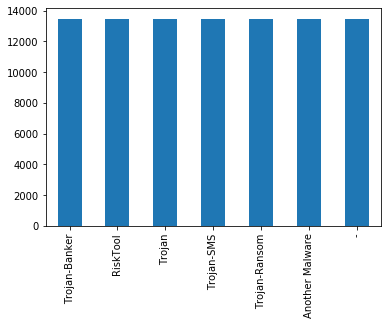

In [32]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
# fit the model
xgb.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = xgb.predict(X_train_new)

# prediction for Testing data
test_pred_sm = xgb.predict(X_test)


In [37]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.6104580290229915
Accuracy score for Testing Dataset =  0.5704265674205554


In [20]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted            -  Another Malware  RiskTool  Trojan  Trojan-Banker  \
True                                                                       
-                 7060              166      2072    1921            548   
Another Malware   2064              946      1340    2404           2549   
RiskTool          1059               80     10833     131            101   
Trojan            5218                0       513    4135           1829   
Trojan-Banker     1046              500       651    2610           1330   
Trojan-Ransom      646               90      2821    1150            270   
Trojan-SMS        1620             1017      2229     950           1543   
All              18713             2799     20459   13301           8170   

Predicted        Trojan-Ransom  Trojan-SMS    All  
True                                               
-                          445        1265  13477  
Another Malware           2689        1485  134

In [21]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted           -  Another Malware  RiskTool  Trojan  Trojan-Banker  \
True                                                                      
-                1779               51       459     490            142   
Another Malware    89               29        44      84             86   
RiskTool           40                6       381       4              1   
Trojan             78                0        15      76             27   
Trojan-Banker      54               38        47     150             53   
Trojan-Ransom      48                8       222      98             31   
Trojan-SMS         83               41       109      45             72   
All              2171              173      1277     947            412   

Predicted        Trojan-Ransom  Trojan-SMS   All  
True                                              
-                          118         331  3370  
Another Malware             88          43   463  
RiskTool  